In [33]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
import math


In [269]:
from numpy.linalg import inv
def linearRegress(D,y):
    return (np.matmul(np.matmul(inv(np.matmul(D.T,D)),D.T),y))

In [453]:
def grfn(N,dVC):
#     print(N)

#     sum = 0
#     for i in range(dVC+1):
#         sum = sum+comb(N,i)
# #     print(sum)
# #     print(math.pow(N,dVC))
#     return(sum)
    return(math.pow(N,dVC))
        
def vcbnd(N,dVC,delta):
#     v1 = math.sqrt((math.log(4*grfn(2*N,dVC)/delta)*8)/N)
#     v2 = math.sqrt(((math.log(4/delta)+dVC*math.log(2*N))*8)/N)
#     print(v1)
#     print(v2)
    return(math.sqrt(((math.log(4/delta)+dVC*math.log(2*N))*8)/N))

#     return(math.sqrt((math.log(4*grfn(2*N,dVC)/delta)*8)/N))
    
def RPbnd(N,dVC,delta):
    return(math.sqrt((2*math.log(2*N*grfn(N,dVC)))/N)+math.sqrt((2*math.log(1/delta))/N)+(1/N))

def PVdBbnd(N,dVC,delta):
    e1=0.00000001
    tol = 10000000
    while (tol > 0.00000000001):
        e2 = (math.sqrt((2*e1+math.log((6*grfn(2*N,dVC))/delta))/N))
        tol = abs(e2 - e1)
#         print("Step {} : {} : diff : {}".format(i,e2,e2-e1))
        e1 = e2
#     print("-----------")
    return(e1)

def Dbnd(N,dVC,delta):
    e1=0.00000001
    tol = 10000000
    while (tol > 0.00000000001):
#         v1 = math.sqrt(((4*e1*(1+e1))+(math.log((4*grfn(N*N,dVC))/delta)))/(2*N))
#         v2 = math.sqrt(((4*e1*(1+e1))+(math.log(4/delta)+(2*dVC*math.log(N))))/(2*N))
#         print(v1)
#         print(v2)
#         print("----------")
#         e2 = math.sqrt(((4*e1*(1+e1))+(math.log((4*grfn(N*N,dVC))/delta)))/(2*N))
        e2 = math.sqrt(((4*e1*(1+e1))+(math.log(4/delta)+(2*dVC*math.log(N))))/(2*N))

        tol = abs(e2 - e1)
#         print("Step {} : {} : diff : {}".format(i,e2,e2-e1))
        e1 = e2
#     print("-----------")
    return(e1)



def solveN(e,dVC,delta):
    N = 100
    for i in range(10):
        N = ((8/e**2)*math.log(4*grfn(2*N,dVC)/delta))
        print("Step {} : {}".format(i,N))
    

[   1000.    2000.    3000.    4000.    5000.    6000.    7000.    8000.
    9000.   10000.   11000.   12000.   13000.   14000.   15000.   16000.
   17000.   18000.   19000.   20000.   21000.   22000.   23000.   24000.
   25000.   26000.   27000.   28000.   29000.   30000.   31000.   32000.
   33000.   34000.   35000.   36000.   37000.   38000.   39000.   40000.
   41000.   42000.   43000.   44000.   45000.   46000.   47000.   48000.
   49000.   50000.   51000.   52000.   53000.   54000.   55000.   56000.
   57000.   58000.   59000.   60000.   61000.   62000.   63000.   64000.
   65000.   66000.   67000.   68000.   69000.   70000.   71000.   72000.
   73000.   74000.   75000.   76000.   77000.   78000.   79000.   80000.
   81000.   82000.   83000.   84000.   85000.   86000.   87000.   88000.
   89000.   90000.   91000.   92000.   93000.   94000.   95000.   96000.
   97000.   98000.   99000.  100000.]
[ 1.75368674  1.29473474  1.08241429  0.95261941  0.86246071  0.79499696
  0.74198395 

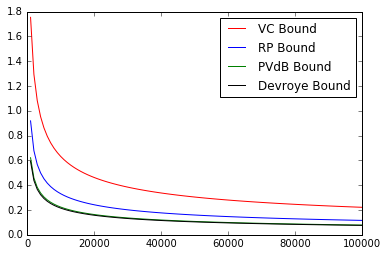

In [454]:
def hw2():
    iterations = 100
    dVC = 50
    delta = 0.05
    scale = 1000
    
    Nval = np.zeros(iterations)
    vcval = np.zeros(iterations)
    rpval = np.zeros(iterations)
    pvdbval = np.zeros(iterations)
    dval = np.zeros(iterations)


    for i in range(iterations):
#         print(i)
        Nval[i] = (i+1)*scale
        vcval[i] = (vcbnd(Nval[i],dVC,delta))
        rpval[i] = (RPbnd(Nval[i],dVC,delta))
        pvdbval[i] = PVdBbnd(Nval[i],dVC,delta)
        dval[i] = Dbnd(Nval[i],dVC,delta)


    print(Nval)
    print(vcval)
    print(rpval)
    print(pvdbval)
    print(dval)
    
    plt.plot(Nval,vcval,c='r',label='VC Bound')
    plt.plot(Nval,rpval,c='b',label='RP Bound')
    plt.plot(Nval,pvdbval,c='g',label='PVdB Bound')
    plt.plot(Nval,dval,c='black',label='Devroye Bound')
    
    plt.legend()
    plt.show()
    
hw2()

In [474]:
def hw3():
    dVC = 50
    delta = 0.05
    N = 1000000
    print("VC Bound : {}".format(vcbnd(N,dVC,delta)))

    print("RP Bound : {}".format(RPbnd(N,dVC,delta)))

    print("PVdB Bound : {}".format(PVdBbnd(N,dVC,delta)))

    print("D Bound : {}".format(Dbnd(N,dVC,delta)))
hw3()

VC Bound : 0.07641020421702248
RP Bound : 0.04000628097861811


OverflowError: math range error

5.7551997756 -1.48748328257
Bias : 3.6481419240990616
Variance : 0.0
Expected OOS Error : 3.6481419240990616


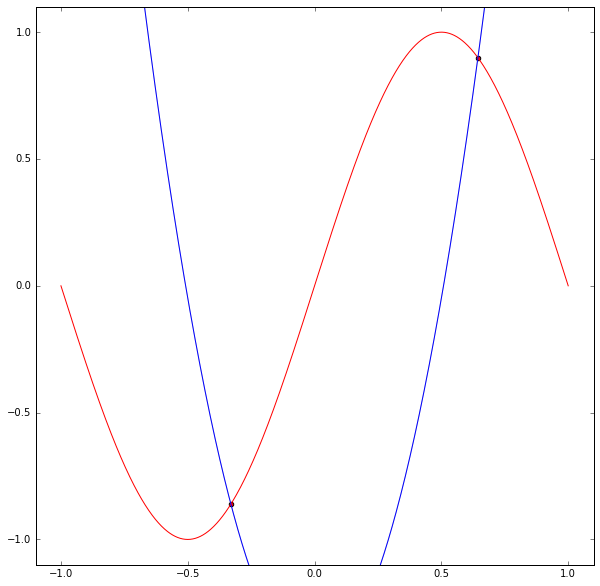

In [584]:
def hw4():
    numtries = 1000
    trials = 1
    X = np.array([(-1+2/numtries*x) for x in range(numtries+1)])
#     y = np.array([math.sin(i) for i in X*math.pi])
    y = np.array([math.sin(math.pi*x) for x in X])
    
    a_d = np.zeros(trials)
    b_d = np.zeros(trials)
    
    plt.figure(figsize=(10,10))
    plt.xlim([-1.1,1.1])
    plt.ylim([-1.1,1.1])
    
    plt.plot(X,y,c='r',linewidth=1)
    for trial in range(trials):
        p1 = random.randint(0,numtries-1)
        p2 = random.randint(0,numtries-1)
        x1 = X[p1]
        x2 = X[p2]
        y1 = y[p1]
        y2 = y[p2]
        plt.scatter([x1,x2],[y1,y2],c='r')

#         # form y = b so a constant
#         b = (y1+y2)/2
#         b_d[trial] = b
#         plt.plot([-1,1],[b,b],c='gray',alpha=0.1)
        
#         # form y = ax so no intercept term added to the X vector
#         X2 = (np.array([[x1*x1],[x2*x2]]))
#         Y2 = (np.array([[y1],[y2]]))
#         w = linearRegress(X2,Y2)
#         a_d[trial] = (w[0][0])
#         plt.plot([-1,1],[-a_d[trial],a_d[trial]],c='gray',alpha=0.1)
#         y_t = np.array([a_d[trial]*x*x for x in X])
#         plt.plot(X,y_t,c='gray',alpha=0.3)


#         # form y = ax + b
        X2 = (np.array([[1,x1*x1],[1,x2*x2]]))
        Y2 = (np.array([[y1],[y2]]))
        w = linearRegress(X2,Y2)
        b_d[trial] = w[0][0]
        a_d[trial] = w[1][0]
#         plt.plot([-1,1],[-a_d[trial]+b_d[trial],a_d[trial]+b_d[trial]],c='gray',alpha=0.4)
        y_t = np.array([a_d[trial]*x*x+b_d[trial] for x in X])
        plt.plot(X,y_t,c='gray',alpha=0.3)

    
    

    # form y = ax
    avg_a = sum(a_d)/trials
    avg_b = sum(b_d)/trials
    print(avg_a,avg_b)
    
        # Bias for y = b
#     bias = sum((y-avg_b)**2)/numtries

    # Bias for y = ax
#     bias = (sum(((X**2)*avg_a-y)**2)/numtries)

    # Bias for y = ax + b
    bias = (sum((((X**2)*avg_a+avg_b)-y)**2)/numtries)


    varsum = 0
    for idx in range(numtries+1):
        
        eDsum = 0
        for trial in range(trials):

            # Variance for y = b
#             gDx = b_d[trial]
#             gBx = avg_b

            # Variance for y = ax
#             gDx = a_d[trial]*X[idx]*X[idx]
#             gBx = avg_a*X[idx]*X[idx]
        
            # Variance for y = ax+b
            gDx = a_d[trial]*X[idx]*X[idx] + b_d[trial]
            gBx = avg_a*X[idx]*X[idx]+avg_b
        
            eDsum = eDsum+(gDx-gBx)**2
        eD = eDsum/trials
        varsum = varsum+eD
    variance = varsum/numtries
    print("Bias : {}\nVariance : {}".format(bias,variance))
    print("Expected OOS Error : {}".format(bias + variance))
    y_t = np.array([avg_a*x*x+avg_b for x in X])
    plt.plot(X,y_t,c='blue')

#     plt.plot([-1,1],[m_avg,m_avg],c='blue',linewidth=2)


    plt.show()

    
    
    
hw4()

### y = b
0.0 0.00195226359863

Bias : 0.5000038151444909

Variance : 0.24930231827163774

Expected OOS Error : 0.7493061334161286

### y = ax
1.43950845935 0.0

Bias : 0.27638523476292404

Variance : 0.23800571544057217

Expected OOS Error : 0.5143909502034962

### y = ax+b
0.788059766039 0.00761441811897

Bias : 0.2059994428212849

Variance : 1.7410951863628643

Expected OOS Error : 1.947094629184149

### y = ax^2

0.0226791132748 0.0

Bias : 0.5001033834637539

Variance : 12.725626834711404

Expected OOS Error : 13.225730218175158

In [469]:
np.array([1,2,3])**2

array([1, 4, 9])

In [515]:
#5 idenit 245 cms
245/5


49.0

In [ ]:
36

1 36 : 74 
2 18 : 40
3 12 : 30
4 9  : 26
6 6  : 24